In [1]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Coleta de Dados


In [5]:
symbol = 'GOOGL'
start_date = '2018-01-01'
end_date = '2024-12-31'

df = yf.download(symbol, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2018-01-02,53.258095,53.395556,52.256167,52.256167,31766000
2018-01-03,54.166729,54.394012,53.269013,53.293823,31318000
2018-01-04,54.377140,54.790021,54.302706,54.443143,26052000
2018-01-05,55.098194,55.261462,54.676878,54.758760,30250000
2018-01-08,55.292725,55.538370,55.083804,55.133429,24644000


In [6]:

print("Informações do Dataset:")
print(df.info())
print("\nEstatísticas Descritivas:")
df.describe()

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2018-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   1760 non-null   float64
 1   (High, GOOGL)    1760 non-null   float64
 2   (Low, GOOGL)     1760 non-null   float64
 3   (Open, GOOGL)    1760 non-null   float64
 4   (Volume, GOOGL)  1760 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.5 KB
None

Estatísticas Descritivas:


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,100.799707,101.874309,99.679429,100.744616,3.380927e+07
std,38.736644,39.115127,38.367092,38.731834,1.530324e+07
min,48.864296,50.226501,48.516422,48.846925,9.312000e+06
25%,61.250460,61.786780,60.744657,61.332216,2.400310e+07
50%,99.220322,100.341852,97.433826,98.783616,3.009500e+07
75%,133.876850,135.225163,132.319862,133.746948,3.842050e+07
max,195.892792,200.634216,194.219337,196.480486,1.331780e+08


## 2. Análise Exploratória

In [7]:

print("Valores nulos por coluna:")
print(df.isnull().sum())
df = df.fillna(method='ffill')

Valores nulos por coluna:
Price   Ticker
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64


/tmp/ipykernel_111343/2853968013.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


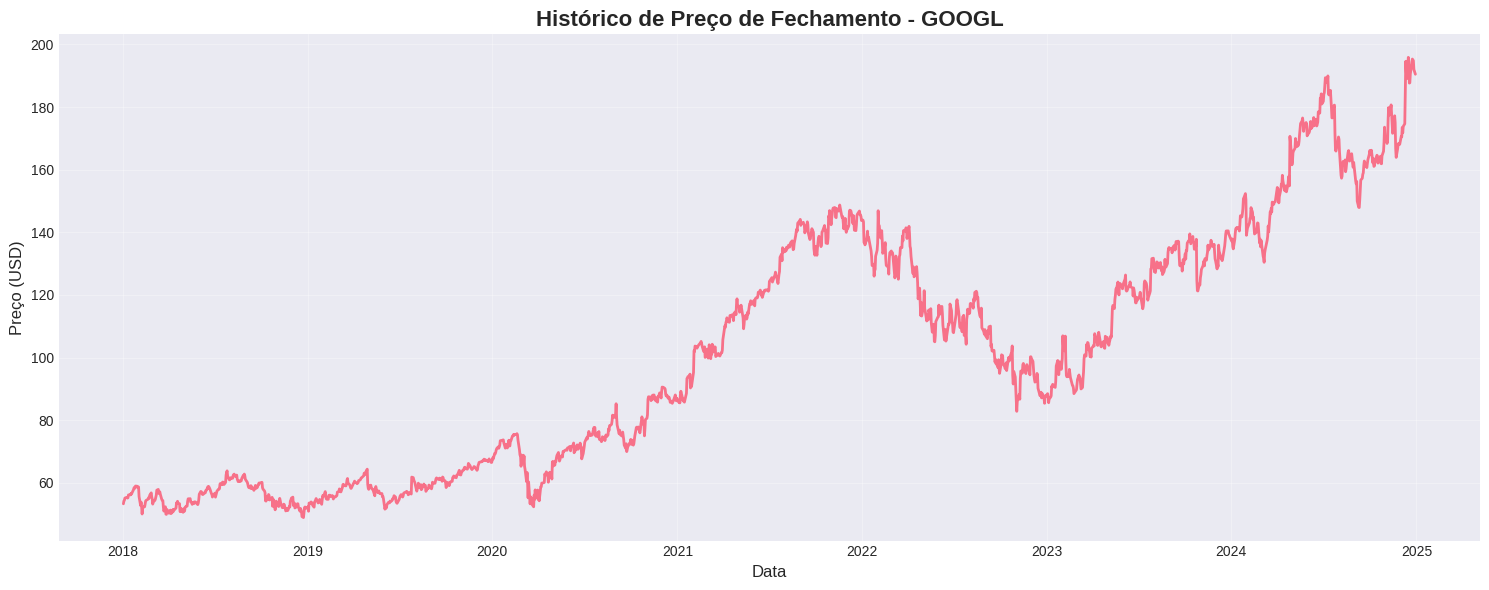

In [8]:
# Visualizar preço de fechamento ao longo do tempo
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], linewidth=2)
plt.title(f'Histórico de Preço de Fechamento - {symbol}', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

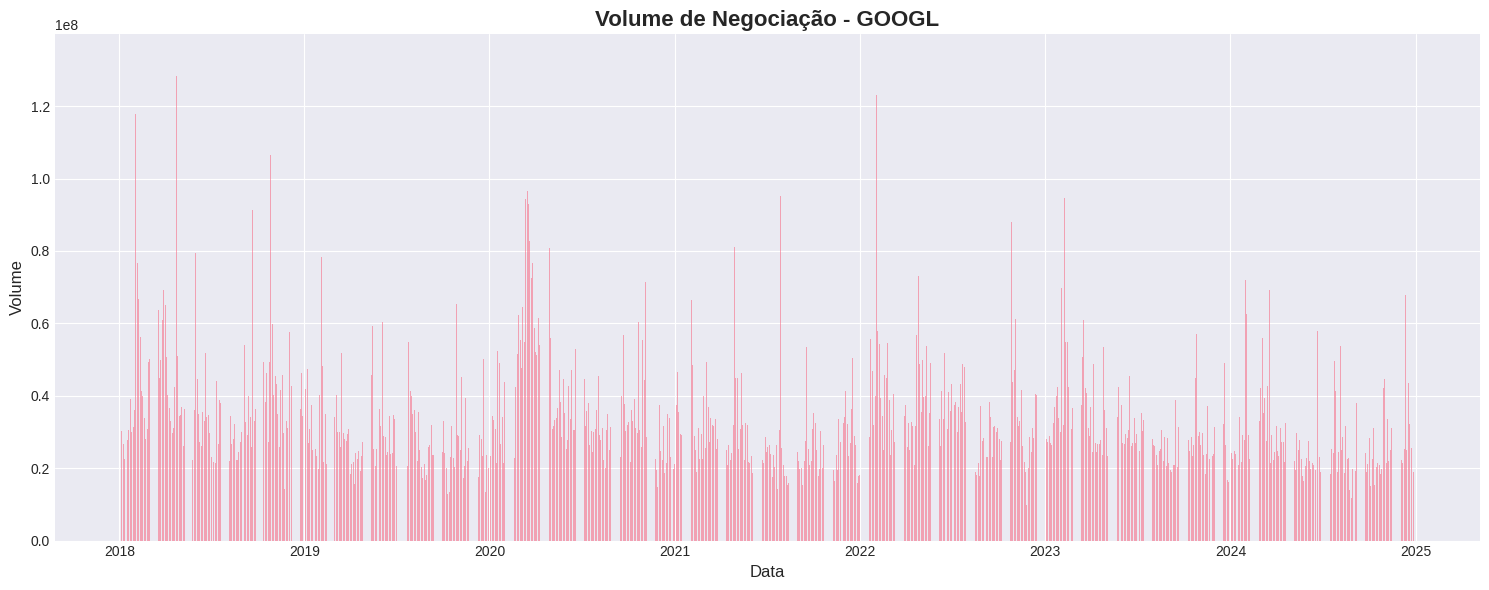

In [15]:
# Análise de volume
plt.figure(figsize=(15, 6))
plt.bar(df.index, df.Volume.GOOGL, alpha=0.6)
plt.title(f'Volume de Negociação - {symbol}', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.tight_layout()
plt.show()

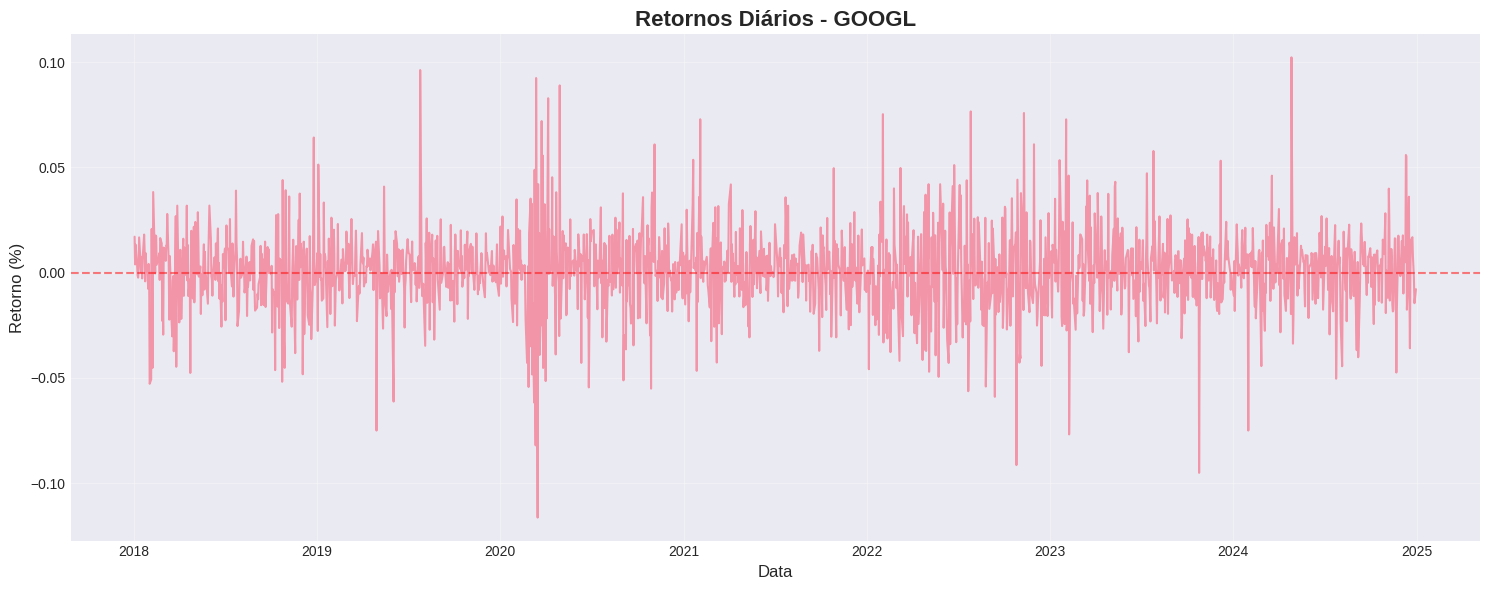

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Daily_Return'], alpha=0.7)
plt.title(f'Retornos Diários - {symbol}', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno (%)', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

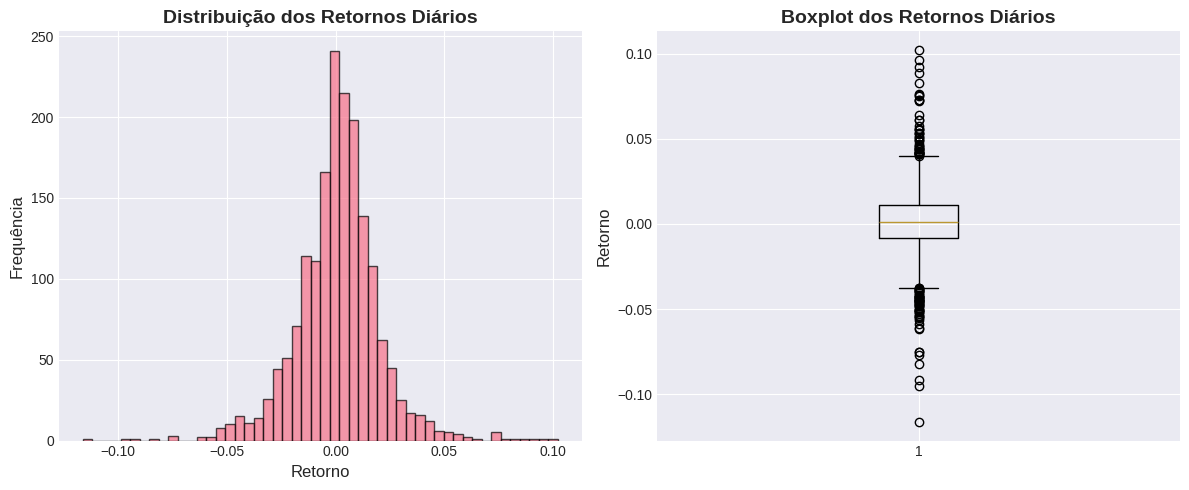

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Daily_Return'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribuição dos Retornos Diários', fontsize=14, fontweight='bold')
plt.xlabel('Retorno', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.subplot(1, 2, 2)
plt.boxplot(df['Daily_Return'].dropna())
plt.title('Boxplot dos Retornos Diários', fontsize=14, fontweight='bold')
plt.ylabel('Retorno', fontsize=12)
plt.tight_layout()
plt.show()

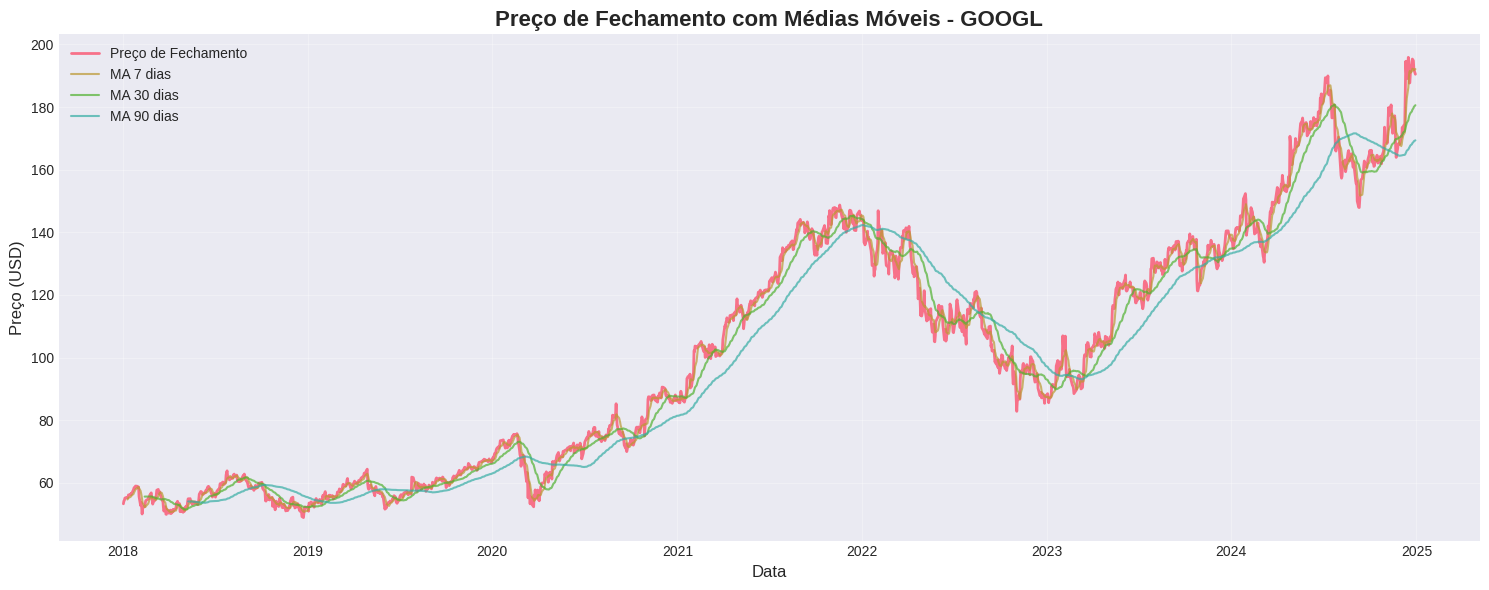

In [ ]:
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], label='Preço de Fechamento', linewidth=2)
plt.plot(df.index, df['MA_7'], label='MA 7 dias', alpha=0.7)
plt.plot(df.index, df['MA_30'], label='MA 30 dias', alpha=0.7)
plt.plot(df.index, df['MA_90'], label='MA 90 dias', alpha=0.7)
plt.title(f'Preço de Fechamento com Médias Móveis - {symbol}', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

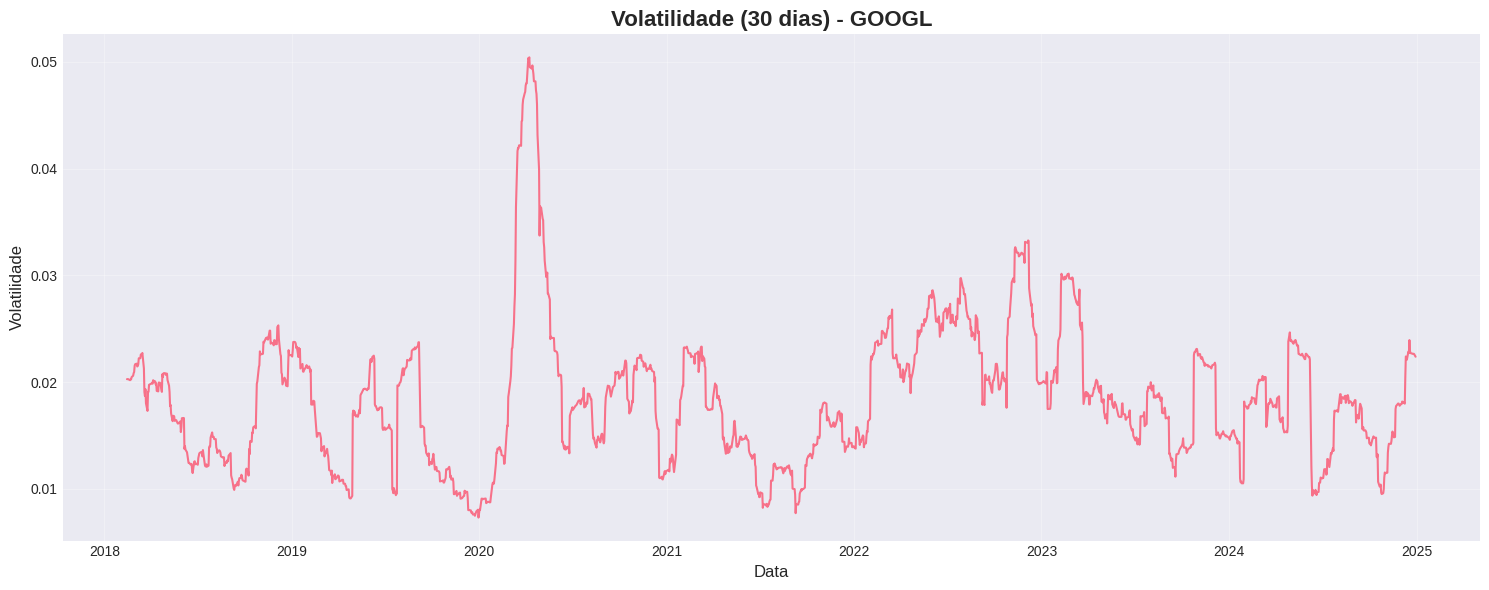

In [ ]:
df['Volatility'] = df['Daily_Return'].rolling(window=30).std()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Volatility'])
plt.title(f'Volatilidade (30 dias) - {symbol}', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volatilidade', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Salvar Dados Processados

In [ ]:
output_path = f'../data/{symbol}_stock_data.csv'
df.to_csv(output_path)
print(f"Dados salvos em: {output_path}")
print(f"Shape final: {df.shape}")

Dados salvos em: ../data/GOOGL_stock_data.csv
Shape final: (1760, 10)


## 4. Resumo Estatístico

In [21]:
# Estatísticas finais
print("="*60)
print(f"RESUMO DOS DADOS - {symbol}")
print("="*60)
print(f"Período: {df.index[0].strftime('%Y-%m-%d')} a {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Total de dias: {len(df)}")
print(f"\nPreço de Fechamento:")
print(f"  - Mínimo: {df['Close'].min()}")
print(f"  - Máximo: ${df['Close'].max()}")
print(f"  - Média: ${df['Close'].mean()}")
print(f"  - Último: ${df['Close'].iloc[-1]}")
print(f"\nRetorno Total: {((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100}%")
print(f"Volatilidade Média: {df['Daily_Return'].std() * 100}%")
print(f"Volume Médio: {df['Volume'].mean()}")
print("="*60)

RESUMO DOS DADOS - GOOGL
Período: 2018-01-02 a 2024-12-30
Total de dias: 1760

Preço de Fechamento:
  - Mínimo: Ticker
GOOGL    48.864296
dtype: float64
  - Máximo: $Ticker
GOOGL    195.892792
dtype: float64
  - Média: $Ticker
GOOGL    100.799707
dtype: float64
  - Último: $Ticker
GOOGL    190.493942
Name: 2024-12-30 00:00:00, dtype: float64

Retorno Total: Ticker
GOOGL    257.68073
dtype: float64%
Volatilidade Média: 1.9396938913649413%
Volume Médio: Ticker
GOOGL    3.380927e+07
dtype: float64
